In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pkg_resources
import pylab
import turtle
import cv2

ModuleNotFoundError: No module named 'cv2'

In [119]:
#check libraries versions
print("networkX version:")
pkg_resources.get_distribution("networkx").version

networkX version:


'3.3'

In [35]:
#https://github.com/Oslandia/qgis-swmm/blob/master/example/example1.inp
path="C:\\Users\\shse\\Documents\\ANACONDA\\UTwin\\example1.inp"

In [37]:
lkm=[]
file = open(path, "r")
lines=file.readlines()
for l in lines:
    lkm.append(l)
file.close()


In [39]:
for l in lkm:
    print(l)

[TITLE]

 SW 1 0 20



[OPTIONS]

FLOW_UNITS          	CFS

INFILTRATION        	HORTON

FLOW_ROUTING        	DYNWAVE

START_DATE          	01/01/1988

START_TIME          	00:00:00

REPORT_START_DATE   	01/01/1988

REPORT_START_TIME   	00:00:00

END_DATE            	01/01/1988

END_TIME            	08:00:00

SWEEP_START         	01/01

SWEEP_END           	12/31

DRY_DAYS            	0

REPORT_STEP         	00:00:30

WET_STEP            	00:15:00

DRY_STEP            	01:00:00

ROUTING_STEP        	0:00:30 

ALLOW_PONDING       	NO

INERTIAL_DAMPING    	NONE

VARIABLE_STEP       	0.75

LENGTHENING_STEP    	0

MIN_SURFAREA        	12.566

NORMAL_FLOW_LIMITED 	SLOPE

SKIP_STEADY_STATE   	NO

FORCE_MAIN_EQUATION 	H-W

LINK_OFFSETS        	DEPTH

MIN_SLOPE           	0



[EVAPORATION]

;Type      	Parameters

;----------	----------

CONSTANT    	0.0

DRY_ONLY     NO



[JUNCTIONS]

;              	Invert    	Max.      	Init.     	Surcharge 	Ponded    

;Name          	Elev.     	Depth   

In [41]:
def extract_info():

    substring1="COORDINATES"
    substring2="CONDUITS"
    
    Node_Names=[]
    Nodes_coord_X=[]
    Nodes_coord_Y=[]

    Cond_Names=[]
    Nodes_in=[]
    Nodes_out=[]

    #service variables
    #nodes
    substr1_offset=2
    string1_substring="["
    string1_list=[]
    coord_flag=False
    
    #coduits
    substr2_offset=2
    string2_substring="["
    string2_list=[]
    
    
    #this are the Nodes information
    for k in lkm:
        
        if(coord_flag==False):
            try:
                k.index(substring1)
            except ValueError:
                pass
            else:
                coord_flag=True
        else:
            try:
                k.index(string1_substring)            
            except ValueError:
                string1_list.append(k)
            else:
                break

    cnt=0
    offset=2
    #nodes names and coordinates
    for k in string1_list:
        if(cnt>=offset):
            st=str(k).split("\t")
            if(len(st)>=2):
                Node_Names.append(st[0].strip())
                Nodes_coord_X.append(float(st[1].strip()))
                Nodes_coord_Y.append(float(st[2].strip()))
        else:
            cnt=cnt+1       

    #this is conduit information
    coord_flag=False
    
    for k in lkm:
        
        if(coord_flag==False):
            try:
                k.index(substring2)
            except ValueError:
                pass
            else:
                coord_flag=True
        else:
            try:
                k.index(string1_substring)            
            except ValueError:
                string2_list.append(k)
            else:
                break

    cnt=0
    offset=4
    #nodes names and coordinates
    for k in string2_list:
        if(cnt>=offset):
            st=str(k).split("\t")
            if(len(st)>=2):
                Cond_Names.append(st[0].strip())
                Nodes_in.append((st[1]).strip())
                Nodes_out.append((st[2]).strip())
        else:
            cnt=cnt+1       
    
    return Node_Names, Nodes_coord_X, Nodes_coord_Y, Cond_Names, Nodes_in, Nodes_out

In [43]:
Node_Names,Nodes_coord_X,Nodes_coord_Y,Cond_Names,Nodes_in,Nodes_out =extract_info()

In [45]:
print(Nodes_out)

['80608', '82309', '81309', '15009', '10208', '16009', '16109', '10309', '16109']


In [131]:
#make graph
G = nx.Graph()
points=[]
for g in range(0,len(Nodes_coord_X)):
    points.append((Nodes_coord_X[g],Nodes_coord_Y[g]))

print("Nodes number: "+str(len(Nodes_coord_X)))
print("__________________")

G.add_nodes_from(points)
#add edges
for i in range(0,len(Cond_Names)):
    indx_in=0
    indx_out=0
    for h in range(0,len(Node_Names)):
        if(Nodes_in[i]==Node_Names[h]):
            indx_in=h
        if(Nodes_out[i]==Node_Names[h]):
            indx_out=h
    #print(indx_in)
    #print(indx_out)
    #print("__________")
    G.add_edge(indx_in, indx_out)
print("Edges number: "+str(len(Nodes_coord_X)))
print("__________________")


Nodes number: 11
__________________
Edges number: 11
__________________


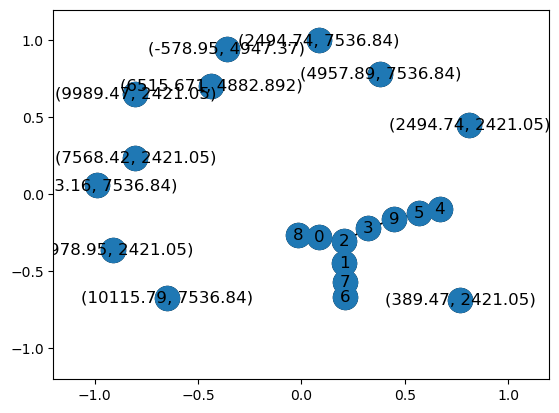

In [133]:
#https://stackoverflow.com/questions/64986306/how-to-plot-a-networkx-graph-using-the-x-y-coordinates-of-the-points-list
#pos = {point: point for point in points}
pos=nx.spring_layout(G)
fig, ax = plt.subplots()
nx.draw(G, pos=pos, node_color='k', ax=ax)
nx.draw(G, pos=pos, node_size=300, ax=ax)  # draw nodes and edges
nx.draw_networkx_labels(G, pos=pos)  # draw node labels/names
plt.axis("on")
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2,1.2)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()
#nx.draw(G, with_labels=True, font_weight='bold')
#nx.draw_networkx_labels(G, pos, Node_Names, font_size=22, font_color="whitesmoke")

In [135]:
pos1 =dict(zip(points,Node_Names))
print(pos1)
print("===========================================")
print(pos)

{(389.47, 2421.05): '10309', (4978.95, 2421.05): '15009', (2494.74, 2421.05): '16009', (2494.74, 7536.84): '16109', (10115.79, 7536.84): '80408', (7463.16, 7536.84): '80608', (9989.47, 2421.05): '81009', (7568.42, 2421.05): '81309', (-578.95, 4947.37): '10208', (4957.89, 7536.84): '82309', (6515.671, 4882.892): 'OffLine'}
{(389.47, 2421.05): array([ 0.76911796, -0.68438373]), (4978.95, 2421.05): array([-0.91292577, -0.36151022]), (2494.74, 2421.05): array([0.81193601, 0.45187944]), (2494.74, 7536.84): array([0.08249947, 1.        ]), (10115.79, 7536.84): array([-0.64828322, -0.67151733]), (7463.16, 7536.84): array([-0.988401  ,  0.05967838]), (9989.47, 2421.05): array([-0.80313959,  0.65399457]), (7568.42, 2421.05): array([-0.80402334,  0.23816225]), (-578.95, 4947.37): array([-0.36100617,  0.94779819]), (4957.89, 7536.84): array([0.38166417, 0.78183913]), (6515.671, 4882.892): array([-0.43652913,  0.7067663 ]), 4: array([ 0.66922737, -0.09552553]), 5: array([ 0.56865594, -0.1221367 ])

NetworkXError: Node 4 has no position.

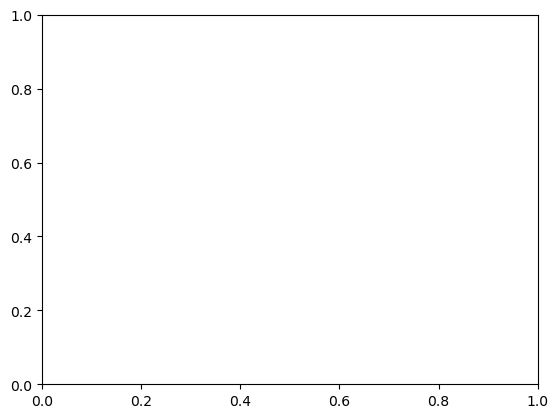

In [71]:
fig, ax = plt.subplots()
nx.draw(G, pos=pos1, node_color='k', node_size=300, ax=ax)
plt.show()

In [73]:
A = nx.adjacency_matrix(G)

In [75]:
#new graph
pos = {node_name:(x, y) for (node_name, (x,y)) in nx.get_node_attributes(G, 'pos').items()}
print(pos)

{}


NetworkXError: Node (389.47, 2421.05) has no position.

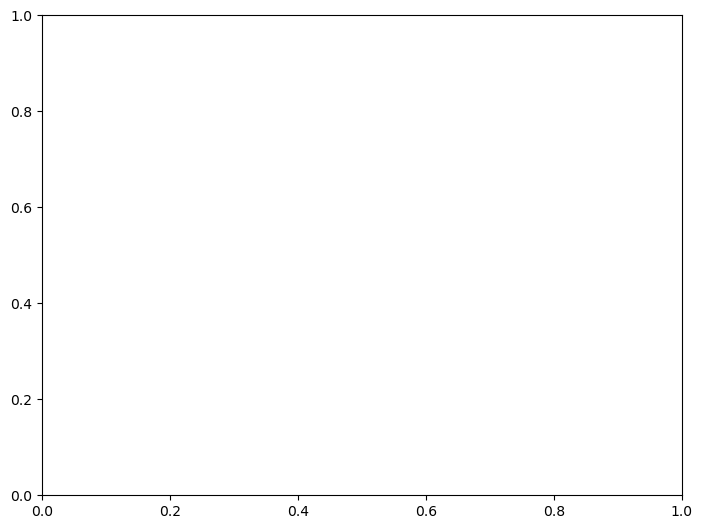

In [77]:
nx.draw(G, pos, with_labels=True, node_size=0)

In [143]:
#print(A)
print(np.shape(A))
print(A.todense())

(21, 21)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]]


In [308]:
Graph = nx.DiGraph(directed=True,strict=True)#Graph()
#add nodes
for l in range(0,len(Node_Names)):
    Graph.add_node(Node_Names[l], pos=(float(points[l][0]), float(points[l][1])))
#add edges
cnt_edge=0
for i in range(0,len(Cond_Names)):
    indx_in=0
    indx_out=0
    for h in range(0,len(Node_Names)):
        if(Nodes_in[i]==Node_Names[h]):
            indx_in=h
        if(Nodes_out[i]==Node_Names[h]):
            indx_out=h
    #Graph.add_edge(indx_in, indx_out, egdes = cnt_edge)
    Graph.add_edge(Node_Names[indx_in], Node_Names[indx_out], egdes = cnt_edge)
    cnt_edge=cnt_edge+1

In [310]:
pos2={}
for i in range(0,len(points)):
    pos2[Node_Names[i]] =  np.asarray((float(points[i][0]),float(points[i][1])))   
    #class a: pass
    #a.node_name =  ""
    #a.pos       =  np.asarray((0,0))    
    #setattr(a,"node_name", str(Node_Names[i]))    
    #setattr(a,"pos", np.asarray((float(points[i][0]),float(points[i][1]))))
    #pos2.update(a)

#pos = {n_name:np.array(x, y)  for (n_name, (x,y)) in nx.get_node_attributes(Graph, 'pos').items()}
#pos1=nx.spring_layout(Graph)
#print(pos1)
#print("==================================")
#print(pos2)
#print("==================================")

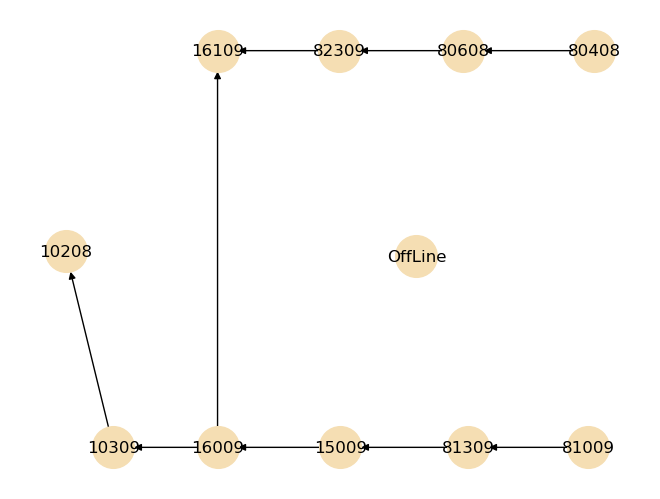

In [314]:
nx.draw(Graph, pos=pos2, node_color='wheat', node_size=900,with_labels=True)
pylab.show()

In [316]:
Adj_M = nx.adjacency_matrix(G)
print(Adj_M)#.todense())

  (11, 12)	1
  (12, 11)	1
  (12, 13)	1
  (13, 12)	1
  (13, 20)	1
  (14, 15)	1
  (15, 14)	1
  (15, 16)	1
  (16, 15)	1
  (16, 19)	1
  (17, 18)	1
  (17, 19)	1
  (18, 17)	1
  (19, 16)	1
  (19, 17)	1
  (19, 20)	1
  (20, 13)	1
  (20, 19)	1


#CLOUD GENERATOR
#1 - CLOUD GENERATOR

In [ ]:
#CLOUD GENERATOR 1
myTurtle = turtle.Turtle()
myTurtle.circle(50)
turtle.getscreen()._root.mainloop()